In [125]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot the accuracies for a grid search for ridge regression

In [126]:
eval = pickle.load(open("evaluation/ridge_regression_eval_3.p", "rb"))
print(len(eval))

42


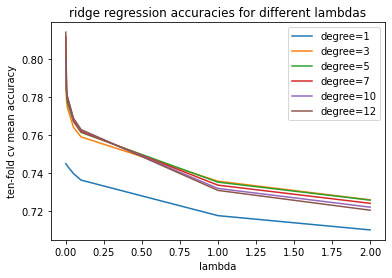

In [127]:
degrees = []
x = []

for el in eval:
    if el['parameters']['lambda_'] not in x:
        x.append(el['parameters']['lambda_'])
    if el['poly_degree'] not in degrees:
        degrees.append(el['poly_degree'])

x = np.array(x)
x = np.sort(x).tolist()
degrees = np.array(degrees)
degrees = np.sort(degrees).tolist()

y = [[0 for x in range(len(x))] for y in range(len(degrees))]

for el in eval:
    index = x.index(el['parameters']['lambda_'])
    index2 = degrees.index(el['poly_degree'])
    y[index2][index] = el['mean_accuracy']
    
for index, line in enumerate(y):
    plt.plot(x, line, label='degree=' + str(degrees[index]))

plt.title('ridge regression accuracies for different lambdas')
plt.xlabel('lambda')
plt.ylabel('ten-fold cv mean accuracy')
plt.legend()
plt.savefig('plots/ridge_accuracies.png')
plt.show()